# Root Locus

## Induction machine dynamics:
$
p\left[ \begin{array}{c}
	i_s\\
	\psi _{\mu}\\
\end{array} \right] =\left[ \begin{matrix}
	\frac{1}{L_{\sigma}}\left( -r_s-r_{req} \right) I&		\frac{1}{L_{\sigma}}\alpha I-\omega J\\
	r_{req}I&		-\alpha I+\omega J\\
\end{matrix} \right] \left[ \begin{array}{c}
	i_s\\
	\psi _{\mu}\\
\end{array} \right] +\left[ \begin{array}{c}
	\frac{1}{L_{\sigma}}I\\
	0\\
\end{array} \right] u_s
$


In [8]:
%matplotlib inline
from pylab import *
mpl.rcParams['figure.dpi']= 200

from IPython.display import display, Latex
from sympy import *
init_printing(use_latex='mathjax')

# Symbols
I = Identity(2).as_explicit()
I = eye(2)
J = Matrix(2,2,[0,-1,1,0])
display(I, J)

omega = Symbol(r'\omega')
r_s, r_req, L_sigma, L_mu = symbols(r'r_s, r_{req}, L_\sigma, L_\mu')
alpha = r_req / L_mu
p = symbols(r'p')

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

⎡0  -1⎤
⎢     ⎥
⎣1  0 ⎦

In [9]:
A = MatrixSymbol('A', 4, 4)
A = BlockMatrix([[(-r_s-r_req)/L_sigma*I, alpha/L_sigma*I-omega/L_sigma*J], 
                 [r_req*I, -alpha*I+omega*J]])
substitution = {r_s:3, r_req:1.6, L_sigma:0.024, L_mu:0.4, omega:10}
# substitution = {r_s:0.208, r_req:0.254, L_sigma:23.5e-3/20, L_mu:23.5e-3*19/20, omega:10} # 1993-Yang.Chin-Adaptive
print(substitution)
display(A, A.subs(substitution))

# Option 1: roots
# factor(A.as_explicit().subs(substitution).charpoly(p))
display(A.as_explicit().subs(substitution).charpoly(p))
# https://github.com/sympy/sympy/issues/14982
# roots(mat.charpoly(simplify=fu))
print('-'*40, '\nOPTION I')
display(roots(A.as_explicit().subs(substitution).charpoly(p)))
for k, y in roots(A.as_explicit().subs(substitution).charpoly(p)).items():
    print(k, y)
print(type(k))

# Option 2: eigenvalues
print('-'*40, '\nOPTION II')
display(A.as_explicit().subs(substitution).eigenvals())
for k, y in A.as_explicit().subs(substitution).eigenvals().items():
    print(k, y)
print(type(k))

{r_s: 3, r_{req}: 1.6, L_\sigma: 0.024, L_\mu: 0.4, \omega: 10}


⎡⎡-rₛ - r_{req}               ⎤  ⎡   r_{req}          \omega    ⎤⎤
⎢⎢─────────────        0      ⎥  ⎢──────────────     ────────   ⎥⎥
⎢⎢   L_\sigma                 ⎥  ⎢L_\mu⋅L_\sigma     L_\sigma   ⎥⎥
⎢⎢                            ⎥  ⎢                              ⎥⎥
⎢⎢               -rₛ - r_{req}⎥  ⎢   -\omega         r_{req}    ⎥⎥
⎢⎢      0        ─────────────⎥  ⎢   ────────     ──────────────⎥⎥
⎢⎣                  L_\sigma  ⎦  ⎣   L_\sigma     L_\mu⋅L_\sigma⎦⎥
⎢                                                                ⎥
⎢                                     ⎡-r_{req}            ⎤     ⎥
⎢                                     ⎢─────────   -\omega ⎥     ⎥
⎢      ⎡r_{req}     0   ⎤             ⎢  L_\mu             ⎥     ⎥
⎢      ⎢                ⎥             ⎢                    ⎥     ⎥
⎢      ⎣   0     r_{req}⎦             ⎢           -r_{req} ⎥     ⎥
⎢                                     ⎢ \omega    ─────────⎥     ⎥
⎣                                     ⎣             L_\mu  ⎦  

⎡⎡-191.666666666667          0        ⎤  ⎡166.666666666667   416.666666666667⎤
⎢⎢                                    ⎥  ⎢                                   ⎥
⎢⎣        0          -191.666666666667⎦  ⎣-416.666666666667  166.666666666667⎦
⎢                                                                             
⎢              ⎡1.6   0 ⎤                            ⎡-4.0  -10 ⎤             
⎢              ⎢        ⎥                            ⎢          ⎥             
⎣              ⎣ 0   1.6⎦                            ⎣ 10   -4.0⎦             

⎤
⎥
⎥
⎥
⎥
⎥
⎦

PurePoly(1.0*p**4 + 391.333333333333*p**3 + 39385.4444444445*p**2 + 220666.666
666667*p + 1812500.0, p, domain='RR')

---------------------------------------- 
OPTION I


{-192.956412669182 - 3.57202548233599⋅ⅈ: 1, -192.956412669182 + 3.572025482335
99⋅ⅈ: 1, -2.71025399748441 - 6.42797451766411⋅ⅈ: 1, -2.71025399748441 + 6.4279
7451766411⋅ⅈ: 1}

-192.956412669182 - 3.57202548233599*I 1
-192.956412669182 + 3.57202548233599*I 1
-2.71025399748441 - 6.42797451766411*I 1
-2.71025399748441 + 6.42797451766411*I 1
<class 'sympy.core.add.Add'>
---------------------------------------- 
OPTION II


⎧                  ________________                       ________________    
⎪  587            ╱ 325669   815⋅ⅈ        587            ╱ 325669   815⋅ⅈ     
⎨- ─── - 5⋅ⅈ -   ╱  ────── - ───── : 1, - ─── - 5⋅ⅈ +   ╱  ────── - ───── : 1,
⎪   6          ╲╱     36       3           6          ╲╱     36       3       
⎩                                                                             

             ________________                       ________________         ⎫
   587      ╱ 325669   815⋅ⅈ              587      ╱ 325669   815⋅ⅈ          ⎪
 - ─── -   ╱  ────── + ─────  + 5⋅ⅈ: 1, - ─── +   ╱  ────── + ─────  + 5⋅ⅈ: 1⎬
    6    ╲╱     36       3                 6    ╲╱     36       3            ⎪
                                                                             ⎭

-587/6 - sqrt(325669/36 + 815*I/3) + 5*I 1
-587/6 - 5*I - sqrt(325669/36 - 815*I/3) 1
-587/6 - 5*I + sqrt(325669/36 - 815*I/3) 1
-587/6 + sqrt(325669/36 + 815*I/3) + 5*I 1
<class 'sympy.core.add.Add'>


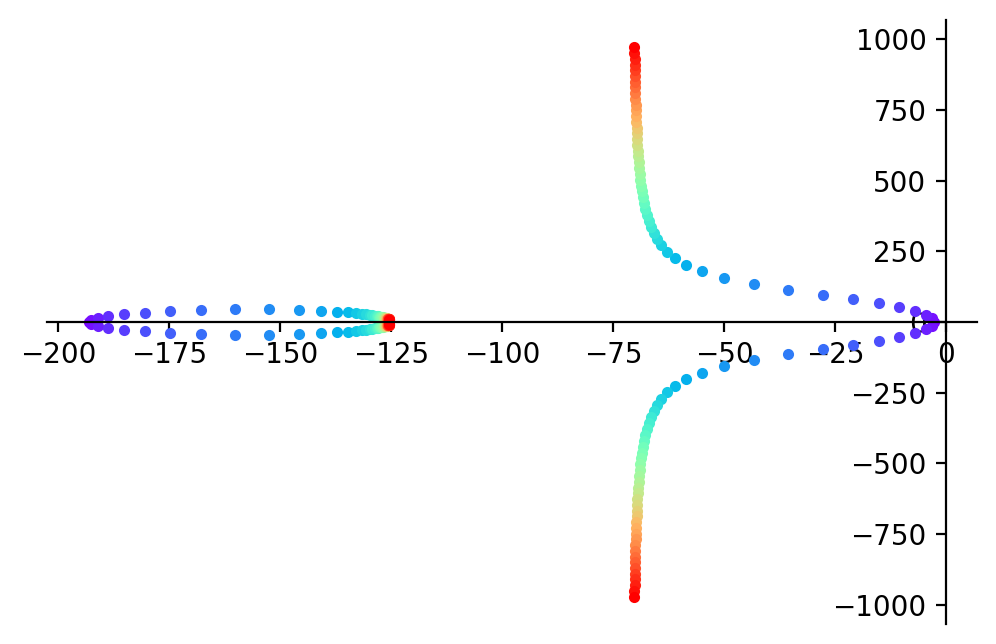

In [10]:
fig = figure()
ax = fig.gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')

omega_range = arange(0, 1000, 20)
colors = cm.rainbow(np.linspace(0, 1, len(omega_range)))
for omega_value, c in zip(omega_range, colors):
    substitution[omega] = omega_value
    for k, y in A.as_explicit().subs(substitution).eigenvals().items():
        ax.plot(complex(k).real, complex(k).imag, '.', color=c)

# fig.savefig(r"C:\Users\horyc\JupyterLab\root_locus.png")

## HFSI Position Observer Error Dynamics

PurePoly(p**3 + \ell_1*p**2 + \ell_2*p + \ell_3, p, domain='ZZ[\ell_1,\ell_2,\
ell_3]')

\operatorname{PurePoly}{\left( p^{3} + \ell_1 p^{2} + \ell_2 p + \ell_3, p, domain=\mathbb{Z}\left[\ell_1, \ell_2, \ell_3\right] \right)}


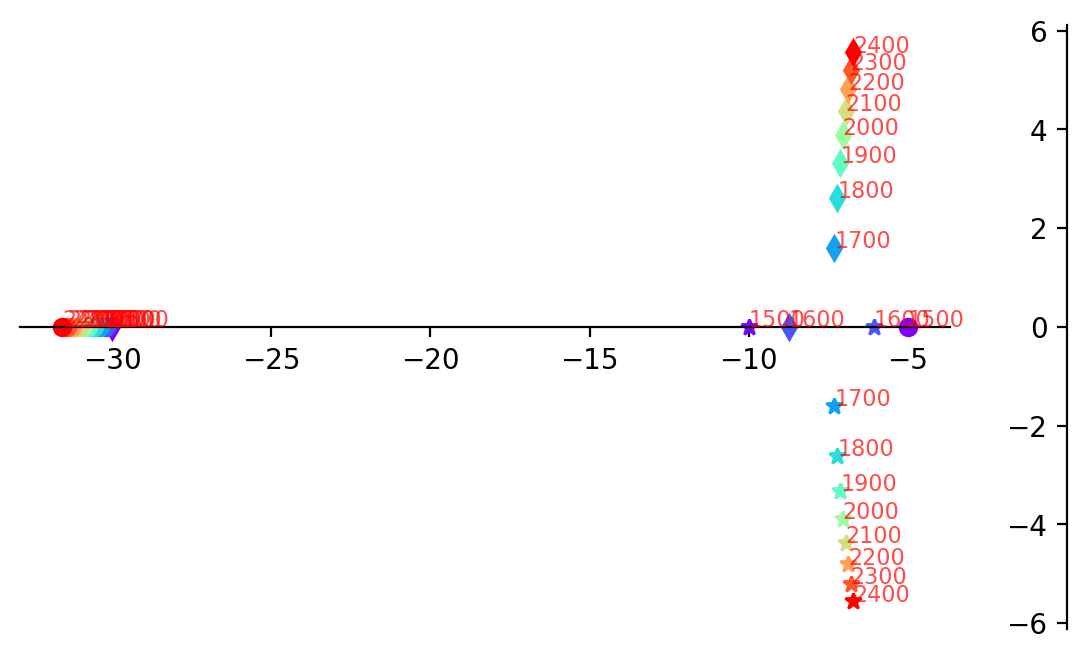

In [56]:
fig = figure()
ax = fig.gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')


ell_1, ell_2, ell_3 = symbols(r'\ell_1, \ell_2, \ell_3')

A = Matrix(3,3,
           [-ell_1, 1, 0,
            -ell_2, 0, -1,
             ell_3, 0, 0])
display(A.charpoly(p))

def colorful_root_locus(which_gain, gain_range, markers=['o', '*', 'd']):
    colors = cm.rainbow(np.linspace(0, 1, len(gain_range)))
    for gain_value, c in zip(gain_range, colors):
        substitution[which_gain] = gain_value
        counter = 0
        for k, v in A.subs(substitution).eigenvals().items():
            ax.plot(complex(k).real, complex(k).imag, marker=markers[counter], color=c)
            ax.text(complex(k).real, complex(k).imag, f'{gain_value}', color='red', alpha=0.7, fontsize=8)
            counter += 1

# substitution = {ell_1:30, ell_2:900, ell_3:1500}
# colorful_root_locus(ell_1, arange(10, 100, 10))

# substitution = {ell_1:45, ell_2:900, ell_3:1500}
# colorful_root_locus(ell_2, arange(200, 1500, 100))

# substitution = {ell_1:45, ell_2:900, ell_3:1500}
substitution = {ell_1:45, ell_2:500, ell_3:1500}
colorful_root_locus(ell_3, arange(1500, 2500, 100))